### 1. Υλοποίηση αλγορίθμων ΚΠ2


## IMPORTS

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from time import time
import operator
from prettytable import PrettyTable, ALL

## Helper Functions

Plotting function

In [3]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
def plot_hull(points, hulls, title, x_step=5, y_step=5):
    plt.figure(figsize=(12, 12))
    plt.scatter(points[:, 0], points[:, 1], c='b', label='Points',zorder=100)
    if not isinstance(hulls,list):
        hulls = [hulls]
    for hull in hulls:   
        plot_points = hull[np.arange(hull.shape[0]+1)%hull.shape[0]]
        plt.plot(plot_points[:,0],plot_points[:,1], 'r-', label='Convex Hull')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(x_step))
    ax.yaxis.set_major_locator(MultipleLocator(y_step))
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    
    ax.grid(which='both')
    ax.grid(which='minor', linestyle='--', linewidth='0.5')
    ax.grid(which='major', linestyle='-', linewidth='1')
    plt.title(title)
    plt.legend()
    plt.show()

Metrics

In [4]:
def orientation(a, b, c):
    arr = np.array([b-a, c-a])
    det = np.linalg.det(arr)
    return det

def polar_angle(p0, p1):
        return np.arctan2(p1[1] - p0[1], p1[0] - p0[0])

def distance_sq(p0, p1):
    return np.sum((p1-p0)**2)

Κατηγορήματα

In [5]:
def ccw(a, b, c): #counterclockwise
    return orientation(a, b, c) > 0

def cw(a, b, c): #clockwise
    return orientation(a, b, c) < 0

def colinear(a, b, c):
    return orientation(a, b, c) == 0

Ταξινόμηση

In [6]:
def polar_angle_sort(array, p, clockwise=False):
    return np.array(sorted(array, key=lambda x:(polar_angle(p, x), distance_sq(p, x)), reverse=clockwise))

## Generate Test Points

In [7]:
rng = np.random.default_rng(seed=37) # for reproducibility
def generate_points(n):
    points = rng.integers(0, 100, size=(n, 2))
    return points
def extract_gp(points,n):
    k = 2
    l = list(points[:2])
    counter = 0
    while k < len(points) and len(l) < n:
        invalid = False
        p = points[k]
        k += 1
        for i in range(len(l)):
            for j in range(i+1,len(l)):
                if colinear(p,l[i],l[j]):
                    counter +=1
                    invalid = True 
                    break
            if invalid:
                break
        if not invalid:
            l.append(p)
    print(counter)
    return l

def valid_point(p,l):
    for i in range(len(l)):
        for j in range(i+1,len(l)):
            if colinear(p,l[i],l[j]):
                return False
    return True

def generate_gp(n):
    max_y = 150
    l = [rng.integers(0, max_y, size=(2)), rng.integers(0, max_y, size=(2))]
    while len(l) < n:
        p = rng.integers(0, max_y, size=(2))
        if valid_point(p,l):
            l.append(p)
    return np.array(l)
input_points=generate_gp(120)
print(input_points)
                

[[ 23 105]
 [ 94  99]
 [ 39  10]
 [136 105]
 [ 42  47]
 [120  67]
 [141 147]
 [ 32   9]
 [  2  27]
 [ 84  16]
 [127 127]
 [105 104]
 [129  36]
 [ 70  19]
 [104 106]
 [124  28]
 [ 87  42]
 [ 81   9]
 [ 30  46]
 [ 38  75]
 [ 22  94]
 [ 37  59]
 [ 43 148]
 [ 92 115]
 [ 61   0]
 [113  49]
 [ 57   3]
 [ 45 126]
 [ 98  54]
 [102 119]
 [124  57]
 [ 69   3]
 [ 24  39]
 [126  84]
 [ 68 114]
 [134  82]
 [ 64   2]
 [ 13 127]
 [109  61]
 [139 113]
 [ 46  34]
 [144   5]
 [ 46  53]
 [132 121]
 [ 23 144]
 [ 64  82]
 [ 95 118]
 [117 111]
 [ 38   4]
 [ 28  38]
 [ 41  17]
 [ 43 107]
 [ 60  54]
 [109  31]
 [  1 133]
 [111 119]
 [ 71  90]
 [134  32]
 [130  95]
 [121  81]
 [ 80  91]
 [ 78  42]
 [ 40   7]
 [127  26]
 [ 60  66]
 [ 62 121]
 [ 67  41]
 [ 39 146]
 [ 68 118]
 [ 97  92]
 [129  20]
 [ 94 101]
 [ 31  94]
 [122 136]
 [ 49 133]
 [147  39]
 [ 52  40]
 [ 88 100]
 [ 41  95]
 [  7  18]
 [122  68]
 [  8  57]
 [ 45 135]
 [146 128]
 [149  32]
 [ 10  34]
 [ 97  26]
 [ 30  25]
 [ 93  92]
 [ 72 131]
 [105  12]

## Υλοποίηση αλγορίθμων ΚΠ2

Αυξητικός Αλγόριθμος Graham's Scan

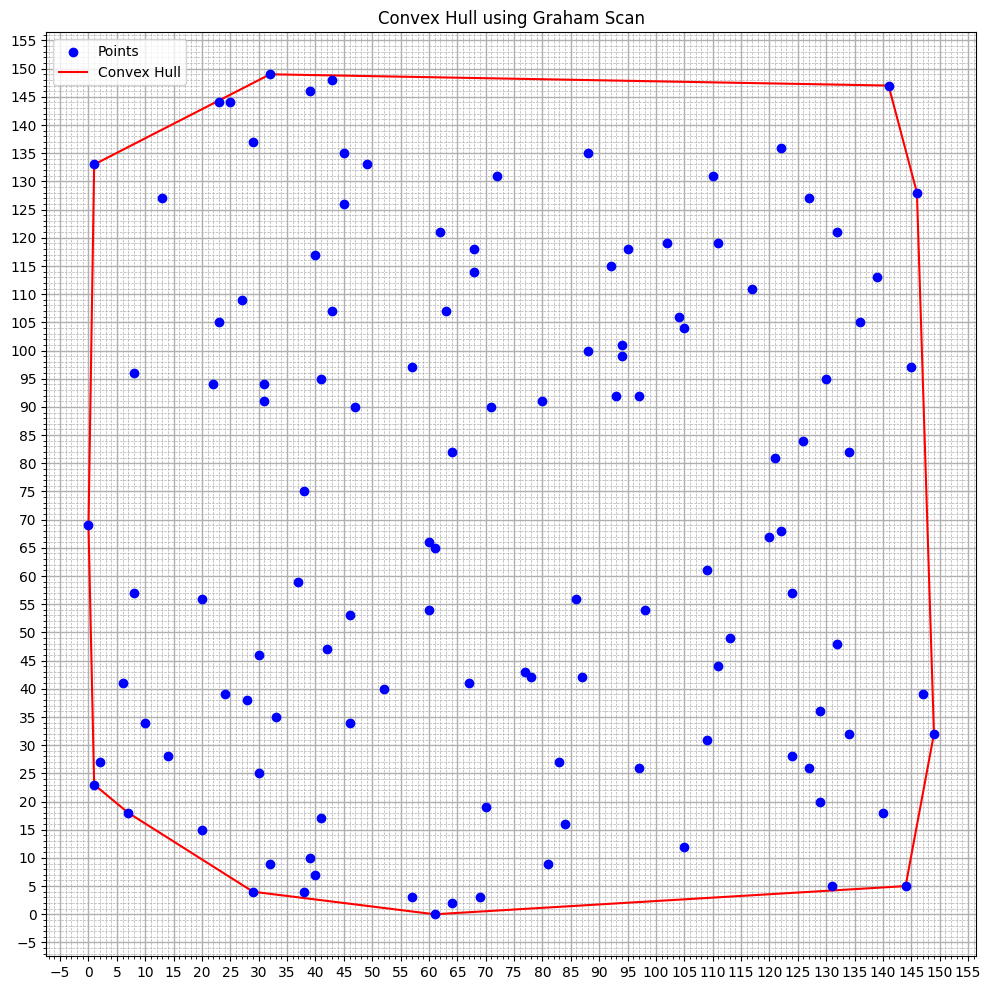

In [8]:
def graham_scan(points):
    if len(points) < 3:
        return points
    start = min(points, key=operator.itemgetter(1,0))
    sorted_points = polar_angle_sort(points,start)
    stack = [sorted_points[0], sorted_points[1]]
    for point in sorted_points[2:]:
        while len(stack) > 1 and  (orientation := ccw(stack[-2],stack[-1],point)) <= 0:
            stack.pop()
        stack.append(point)
    
    return np.array(stack)

hull = graham_scan(input_points)
plot_hull(input_points, hull, 'Convex Hull using Graham Scan')


Αλγόριθμος Περιτυλίγματος

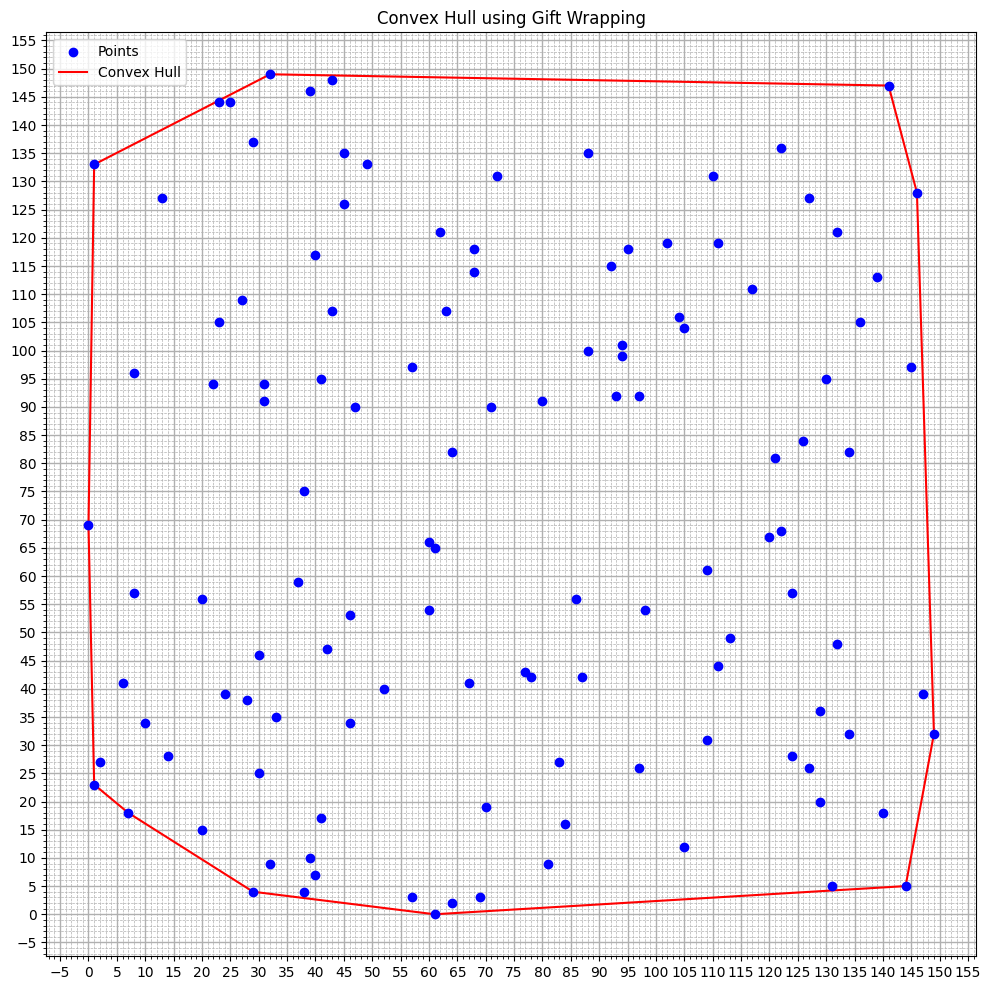

In [9]:
def gift_wrapping(points):
    n = points.shape[0]
    if n < 3:
        return points

    start = min(points, key=operator.itemgetter(0,1))
    hull = []
    s = list(points)
    p = start
    while True:
        hull.append(p)
        q = s[0]
        for r in s[0:]:
            if np.array_equal(p, q) or ccw(p, q, r):
                q = r
        p = q 
        if np.array_equal(q, start):
            break


    return np.array(hull)

hull = gift_wrapping(input_points)
plot_hull(input_points, hull, 'Convex Hull using Gift Wrapping')

Αλγόριθμος Διαίρει και Βασίλευε

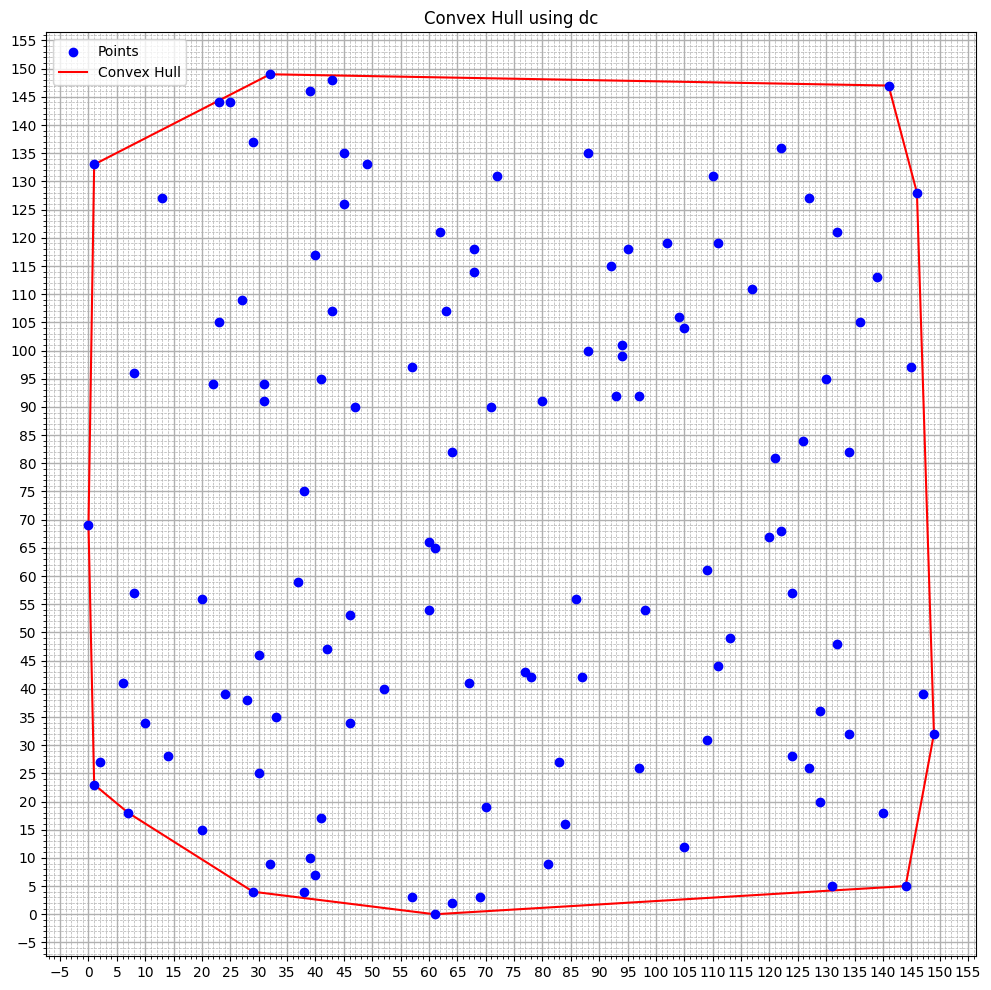

In [10]:
def tangent(hull_left, hull_right, reverse=False):
        n, m = hull_left.shape[0], hull_right.shape[0]
        i, j = -1, 0
        p = hull_left[0]
        A = polar_angle_sort(hull_left,p,clockwise=reverse)
        i = np.argmax(A[:,0])
        q = hull_right[0]
        B = polar_angle_sort(hull_right,q,clockwise=reverse)
        j = np.argmin(B[:,0])
        deleteA, deleteB = [], []
        while True:
            old_i, old_j = i, j
            ii = (i+1) % n
            iii = (i-1) % n
            if n>2 and orientation(A[i], A[ii],B[j])*orientation(A[i], A[ii],A[iii]) <=0: #if cw or colinear
                deleteA.append(i)
                i = ii
            jj = (j - 1) % m
            jjj = (j + 1) % m
            if m>2 and orientation(B[j], B[jj], A[i])*orientation(B[j],B[jj], B[jjj]) <=0: #if ccw or colinear
                deleteB.append(j)
                j = jj
            if i == old_i and j == old_j:
                break
        return np.array([A[i],B[j]]), np.delete(A,deleteA,axis=0), np.delete(B,deleteB,axis=0)

def divide_and_conquer_hull(points):
    def tangents(hull_left, hull_right):
        lowermostL = min(hull_left,key=lambda x: (x[1],x[0]))
        lowermostR = min(hull_right,key=lambda x: (x[1],x[0]))
        A = polar_angle_sort(hull_left, lowermostL)
        B = polar_angle_sort(hull_right, lowermostR)  
        n, m = A.shape[0], B.shape[0]
        startA, startB = np.argmax(A[:,0]), np.argmin(B[:,0])
        upper_tangent = []
        lower_tangent = []
        deletionsA = []
        deletionsB=[]
        while not upper_tangent or not lower_tangent:
            i = startA
            j = startB
            ii = (i + 1) % n
            jj = (j - 1) % m
            counterB = 0
            counterA = 0
            while not upper_tangent:    
                old_i = i
                old_j = j
                while counterB<= len(B) and orientation(B[jj],B[j],A[i]) <= 0:
                    if j != startB:
                        deletionsB.append(j)    
                    j = jj
                    jj = (j - 1) % m
                    counterB += 1
                while counterA <= len(A) and orientation(B[j],A[i],A[ii]) <= 0:
                    if i != startA:
                        deletionsA.append(i)
                    i = ii
                    ii = (i + 1) % n
                    counterA += 1
                if old_i == i and old_j == j:
                    upper_tangent = [A[i],B[j]]
            i = startA
            j = startB
            ii = (i - 1) % n
            jj = (j + 1) % m
            counterB = 0
            counterA = 0
            while not lower_tangent:    
                old_i = i
                old_j = j
                while counterB <= len(B) and orientation(B[jj],B[j],A[i]) >= 0:
                    if not (np.array_equal(B[j],upper_tangent[0]) or np.array_equal(B[j],upper_tangent[1])):
                        deletionsB.append(j)
                    j = jj
                    jj = (j + 1) % m
                    counterB += 1
                while counterA <= len(A) and orientation(B[j],A[i],A[ii]) >= 0:
                    if not (np.array_equal(A[i],upper_tangent[0]) or np.array_equal(A[i],upper_tangent[1])):
                        deletionsA.append(i)
                    i = ii
                    ii = (i - 1) % n
                    counterA += 1
                if old_i == i and old_j == j:
                    lower_tangent = [A[i],B[j]]    
        return np.array(upper_tangent), np.array(lower_tangent), np.delete(A,deletionsA,axis=0), np.delete(B,deletionsB,axis=0)

    def merge(left, right):
        upper_tangent, lower_tangent, A, B = tangents(left, right)
        hull = np.vstack((A,B))
        return hull

    def dc_hull(points):
        if points.shape[0] <= 3:
            return points
        mid = points.shape[0] // 2
        left = dc_hull(points[:mid])
        right = dc_hull(points[mid:])
        return merge(left, right)
    sorted_points = points[np.lexsort((points[:, 1], points[:, 0]))]
    hull = dc_hull(sorted_points)
    hull = polar_angle_sort(hull,min(hull,key=lambda x: (x[1],x[0])))
    return hull
hull = divide_and_conquer_hull(input_points)
plot_hull(input_points, hull, 'Convex Hull using dc')

Αλγόριθμος QuickHull

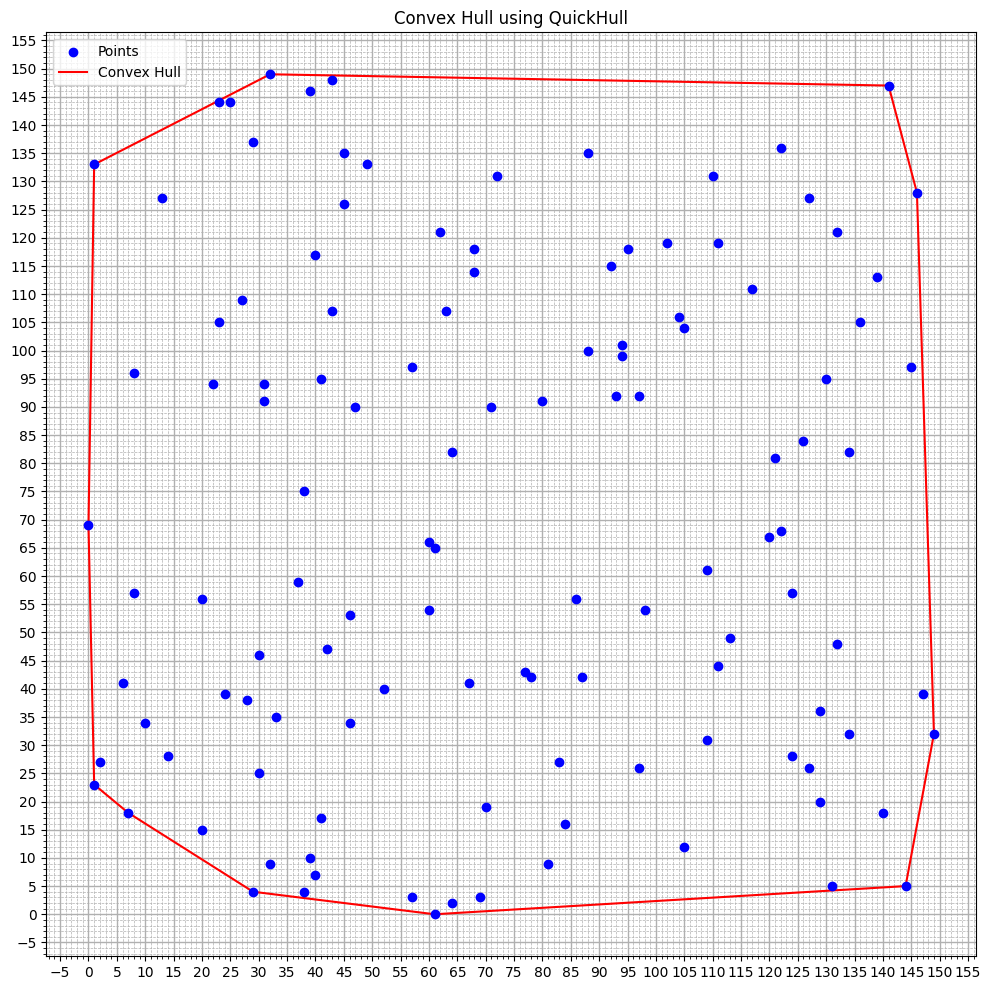

In [190]:
from scipy.spatial import ConvexHull
def quickhull(points):
    hull = ConvexHull(points)
    return points[hull.vertices]
hull = quickhull(input_points)
plot_hull(input_points, hull, 'Convex Hull using QuickHull')

## Performance Comparison

In [212]:

def compare_algorithms(points, num_points):
    algorithms = [
        ("Graham's Scan", graham_scan),
        ("Gift Wrapping", gift_wrapping),
        ("Divide and Conquer", divide_and_conquer_hull),
        ("Quickhull", quickhull)
    ]
    
    results = []
    
    for name, algo in algorithms:
        start_time = time()
        hull = algo(points)
        end_time = time()
        
        execution_time = end_time - start_time
        results.append((name, execution_time, hull))
    
    return results

def create_comparison_table(all_results):
    table = PrettyTable(hrules=ALL)
    table.field_names = ["Algorithm"] + [f"{n} points" for n in all_results.keys()]
    
    for algo in ["Graham's Scan", "Gift Wrapping", "Divide and Conquer", "Quickhull"]:
        row = [algo]
        for n in all_results.keys():
            time = next(r[1] for r in all_results[n] if r[0] == algo)
            row.append(f"{time:.6f}s")
        table.add_row(row)
    
    return table

## Run Comparison

In [213]:
import pprint
point_counts = [10, 20, 40, 60, 80, 100, 120]
all_results = {}
for n in point_counts:
    points = input_points[:n]
    all_results[n] = compare_algorithms(points, n)
comparison_table = create_comparison_table(all_results)
print(comparison_table)

+--------------------+-----------+-----------+-----------+-----------+-----------+------------+------------+
|     Algorithm      | 10 points | 20 points | 40 points | 60 points | 80 points | 100 points | 120 points |
+--------------------+-----------+-----------+-----------+-----------+-----------+------------+------------+
|   Graham's Scan    | 0.000305s | 0.000482s | 0.001127s | 0.001347s | 0.001922s | 0.002271s  | 0.002105s  |
+--------------------+-----------+-----------+-----------+-----------+-----------+------------+------------+
|   Gift Wrapping    | 0.000535s | 0.001254s | 0.002887s | 0.003882s | 0.008103s | 0.008621s  | 0.009474s  |
+--------------------+-----------+-----------+-----------+-----------+-----------+------------+------------+
| Divide and Conquer | 0.001347s | 0.002714s | 0.003415s | 0.007084s | 0.006870s | 0.006471s  | 0.009781s  |
+--------------------+-----------+-----------+-----------+-----------+-----------+------------+------------+
|     Quickhull    

## Ανάλυση
Σε μικρα inputs δουλεύει καλύτερα ο Graham's Scan. Γενικά, ο Quichull κανει τους καλύτερους χρόνους για 40 σημεία και πάνω. D&C και Gift Wrapping τρέχουν περίπου στον ίδιο χρόνο. Οπότε έχουμε:
1. QuickHull
2. Graham's Scan
3. Gift Wrapping
4. Divide & Conquer
